# HOW TO USE Google Earth Engine (EE) and GEEMAP: 2nd example

* reference: https://github.com/gee-community/geemap/tree/master/examples 

In [2]:
import geemap

You need to authenticate Earth Engine before using it. The package for the Earth Engine Python API is called earthengine-api, which should have been automatically installed by the geemap package. 

Your credential is stored in `/Users/USERNAME/.config/earthengine/credentials`

In [3]:
import ee
ee.Authenticate()

True

In [6]:
ee.Initialize(project='satellite-example')
# ee.Initialize()
#ee.Initialize(project='<PROJECT-ID>')

## Local raster datasets images

In [7]:
url = 'https://github.com/giswqs/data/raw/main/raster/srtm90.tif'
filename = 'dem.tif'
geemap.download_file(url, filename)

Downloading...
From: https://github.com/giswqs/data/raw/main/raster/srtm90.tif
To: /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/dem.tif
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 16.6M/16.6M [00:00<00:00, 56.7MB/s]


'/Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/dem.tif'

In [10]:
Map = geemap.Map()
Map.add_raster(filename, cmap='terrain', layer_name="DEM")
vis_params = {'min': 0, 'max': 4000, 'palette': 'terrain'}
Map.add_colorbar(vis_params, label='Elevation (m)')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

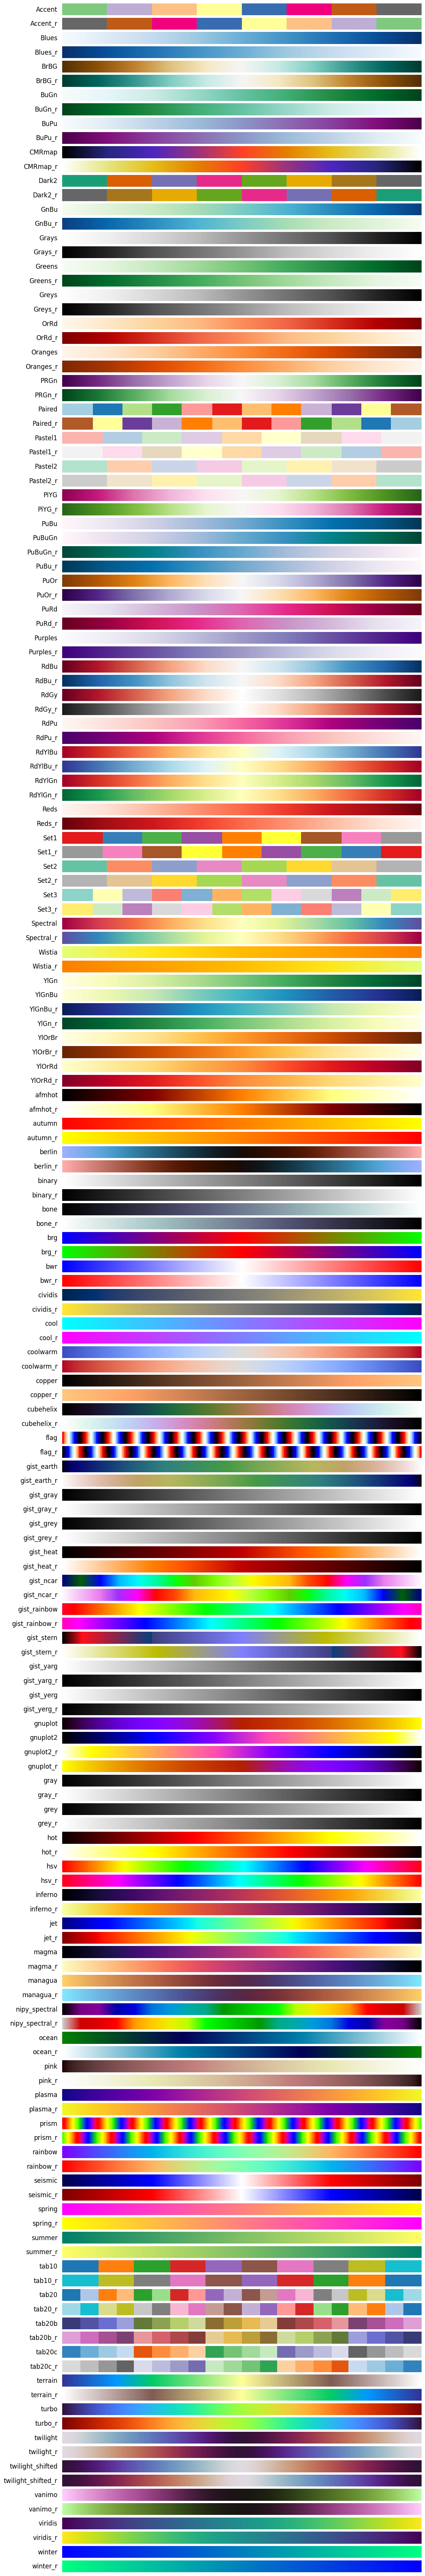

In [12]:
import geemap.colormaps as cm
cm.list_colormaps()
cm.plot_colormaps(width=12, height=0.4)


In [13]:

url = 'https://github.com/giswqs/leafmap/raw/master/examples/data/cog.tif'
filename = 'cog.tif'
geemap.download_file(url, filename)
     

Downloading...
From: https://github.com/giswqs/leafmap/raw/master/examples/data/cog.tif
To: /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/cog.tif
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 611k/611k [00:00<00:00, 3.06MB/s]


'/Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/cog.tif'

In [15]:
Map = geemap.Map()
Map.add_raster(filename, band=[4, 1, 2], layer_name="Color infrared")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [19]:
Map = geemap.Map()
fc = geemap.osm_to_ee("Knoxville, Tennessee")
Map.addLayer(fc, {}, "Knoxville")
Map.centerObject(fc, 11)
Map

Map(center=[35.968524934996715, -83.95017975455033], controls=(WidgetControl(options=['position', 'transparent…

In [20]:

Map = geemap.Map(center=[40, -100], zoom=4)

landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003').select(
    ['B1', 'B2', 'B3', 'B4', 'B5', 'B7']
)

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(landsat7, landsat_vis, "Landsat")

hyperion = ee.ImageCollection('EO1/HYPERION').filter(
    ee.Filter.date('2016-01-01', '2017-03-01')
)

hyperion_vis = {
    'min': 1000.0,
    'max': 14000.0,
    'gamma': 2.5,
}
Map.addLayer(hyperion, hyperion_vis, 'Hyperion')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', tr…

In [24]:
Map = geemap.Map(center=(40, -100), zoom=4)

dem = ee.Image('USGS/SRTMGL1_003')
states = ee.FeatureCollection("TIGER/2018/States")

vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map.addLayer(states, {}, "US States", True)

Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', tr…

In [25]:
Map = geemap.Map()
states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, "US States")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [27]:

vis_params = {
    'color': 'ff0000ff',
    'width': 2,
    'lineType': 'solid',
    'fillColor': '00000000',
}
Map = geemap.Map(center=[40, -100], zoom=4)
states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states.style(**vis_params), {}, "US States")
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', tr…

In [28]:

Map = geemap.Map(center=(25, -115), zoom=5)
url = 'https://labs.mapbox.com/bites/00188/patricia_nasa.webm'
bounds = ((13, -130), (32, -100))
Map.video_overlay(url, bounds)
Map

Map(center=[25, -115], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', tr…

In [29]:
Map = geemap.Map(center=[40, -100], zoom=4)
collection = ee.ImageCollection('USGS/NLCD_RELEASES/2019_REL/NLCD').select('landcover')
vis_params = {'bands': ['landcover']}
years = collection.aggregate_array('system:index').getInfo()
years

['2001', '2004', '2006', '2008', '2011', '2013', '2016', '2019']

In [30]:
Map.ts_inspector(
    left_ts=collection,
    right_ts=collection,
    left_names=years,
    right_names=years,
    left_vis=vis_params,
    right_vis=vis_params,
    width='80px',
)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Dropdown(layout=…

In [31]:
Map = geemap.Map()

collection = (
    ee.ImageCollection('MODIS/MCD43A4_006_NDVI')
    .filter(ee.Filter.date('2018-06-01', '2018-07-01'))
    .select("NDVI")
)
vis_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': 'ndvi',
}

Map.add_time_slider(collection, vis_params, time_interval=2)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [32]:

Map = geemap.Map(center=[37.75, -122.45], zoom=12)

collection = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterBounds(ee.Geometry.Point([-122.45, 37.75]))
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 10)
)

vis_params = {"min": 0, "max": 4000, "bands": ["B8", "B4", "B3"]}

Map.add_time_slider(collection, vis_params)
Map

Map(center=[37.75, -122.45], controls=(WidgetControl(options=['position', 'transparent_bg'], position='toprigh…

In [33]:

url = 'https://github.com/gee-community/geemap/raw/master/examples/data/wind_global.nc'
filename = 'wind_global.nc'
geemap.download_file(url, output=filename)

Downloading...
From: https://github.com/gee-community/geemap/raw/master/examples/data/wind_global.nc
To: /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/wind_global.nc
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1.05M/1.05M [00:00<00:00, 22.6MB/s]


'/Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/wind_global.nc'

## Data Reduction

In [41]:
values

In [38]:
values = ee.List.sequence(1, 10)
print(values.getInfo())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [39]:
count = values.reduce(ee.Reducer.count())
print(count.getInfo())  # 10

10


In [40]:
min_value = values.reduce(ee.Reducer.min())
print(min_value.getInfo())

1


In [42]:
sum_value = values.reduce(ee.Reducer.sum())
print(sum_value.getInfo())

55


In [44]:
# https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1_TOA#description

Map = geemap.Map()

# Load an image collection, filtered so it's not too much data.
collection = (
    ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA")
    .filterDate('2021-01-01', '2021-12-31')
    .filter(ee.Filter.eq('WRS_PATH', 44))
    .filter(ee.Filter.eq('WRS_ROW', 34))
)

# Compute the median in each band, each pixel.
# Band names are B1_median, B2_median, etc.
median = collection.reduce(ee.Reducer.median())

# The output is an Image.  Add it to the map.
vis_param = {'bands': ['B5_median', 'B4_median', 'B3_median'], 'gamma': 2}
Map.setCenter(-122.3355, 37.7924, 8)
Map.addLayer(median, vis_param)
Map

Map(center=[37.7924, -122.3355], controls=(WidgetControl(options=['position', 'transparent_bg'], position='top…

In [46]:
Map = geemap.Map()
image = ee.Image("LANDSAT/LC08/C02/T1/LC08_044034_20140318").select(['B4', 'B3', 'B2'])
maxValue = image.reduce(ee.Reducer.max())
Map.centerObject(image, 8)
Map.addLayer(image, {}, 'Original image')
Map.addLayer(maxValue, {'max': 13000}, 'Maximum value image')
Map

Map(center=[37.47164678275328, -122.14450014746849], controls=(WidgetControl(options=['position', 'transparent…

## Save Images

In [47]:
Map = geemap.Map()

image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318').select(
    ['B5', 'B4', 'B3']
)

vis_params = {'min': 0, 'max': 0.5, 'gamma': [0.95, 1.1, 1]}

Map.centerObject(image, 8)
Map.addLayer(image, vis_params, 'Landsat')
Map

Map(center=[37.47164678275328, -122.14450014746849], controls=(WidgetControl(options=['position', 'transparent…

In [48]:
region = ee.Geometry.BBox(-122.5955, 37.5339, -122.0982, 37.8252)
fc = ee.FeatureCollection(region)
style = {'color': 'ffff00ff', 'fillColor': '00000000'}
Map.addLayer(fc.style(**style), {}, 'ROI')
Map

Map(bottom=25701.0, center=[37.47164678275328, -122.14450014746849], controls=(WidgetControl(options=['positio…

In [49]:
geemap.ee_export_image(image, filename="landsat.tif", scale=30, region=region)


Generating URL ...
Please wait ...
Data downloaded to /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/landsat.tif


In [50]:
projection = image.select(0).projection().getInfo()
projection

{'type': 'Projection',
 'crs': 'EPSG:32610',
 'transform': [30, 0, 460785, 0, -30, 4264215]}

In [51]:

crs = projection['crs']
crs_transform = projection['transform']

In [52]:
geemap.ee_export_image(
    image,
    filename="landsat_crs.tif",
    crs=crs,
    crs_transform=crs_transform,
    region=region,
)

Generating URL ...
Please wait ...
Data downloaded to /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/landsat_crs.tif


In [54]:
geemap.download_ee_image(image, filename='landsat_full.tif', scale=60)


LC08_044034_20140318:   0%|                                                                                   …

In [55]:
fishnet = geemap.fishnet(image.geometry(), rows=4, cols=4, delta=0.5)
style = {'color': 'ffff00ff', 'fillColor': '00000000'}
Map.addLayer(fishnet.style(**style), {}, 'Fishnet')
Map

Map(bottom=25701.0, center=[37.47164678275328, -122.14450014746849], controls=(WidgetControl(options=['positio…

In [56]:
out_dir = 'Downloads'
geemap.download_ee_image_tiles(
    image, fishnet, out_dir, prefix="landsat_", crs="EPSG:3857", scale=30
)
     

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

LC08_044034_20140318:   0%|                                                                                   …

Downloaded 16 tiles in 104.65191912651062 seconds.


In [57]:
region = ee.Geometry.BBox(-122.5003, 37.7233, -122.3410, 37.8026)
rgb_img = geemap.ee_to_numpy(image, region=region)
     

In [58]:
print(rgb_img.shape)


(298, 471, 3)


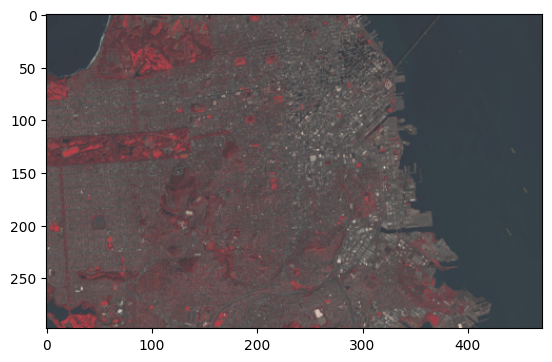

In [59]:
	

import matplotlib.pyplot as plt

rgb_img_test = (255 * ((rgb_img[:, :, 0:3]) + 0.2)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

In [60]:
# point collection
point = ee.Geometry.Point(-99.2222, 46.7816)
collection = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterBounds(point)
    .filterDate('2008-01-01', '2018-01-01')
    .filter(ee.Filter.listContains("system:band_names", "N"))
)

In [61]:
collection.aggregate_array('system:index').getInfo()


['m_4609915_sw_14_1_20090818',
 'm_4609915_sw_14_1_20100629',
 'm_4609915_sw_14_1_20120714',
 'm_4609915_sw_14_1_20140901',
 'm_4609915_sw_14_1_20150926',
 'm_4609915_sw_14_h_20160704',
 'm_4609915_sw_14_h_20170703']

In [62]:
out_dir = 'Downloads2'
geemap.ee_export_image_collection(collection, out_dir=out_dir, scale=10)

Total number of images: 7

Exporting 1/7: Downloads2/m_4609915_sw_14_1_20090818.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/Downloads2/m_4609915_sw_14_1_20090818.tif


Exporting 2/7: Downloads2/m_4609915_sw_14_1_20100629.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/Downloads2/m_4609915_sw_14_1_20100629.tif


Exporting 3/7: Downloads2/m_4609915_sw_14_1_20120714.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/Downloads2/m_4609915_sw_14_1_20120714.tif


Exporting 4/7: Downloads2/m_4609915_sw_14_1_20140901.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/pepc/Teaching/410/course410/06-SatelliteData/ex1/Downloads2/m_4609915_sw_14_1_20140901.tif


Exporting 5/7: Downloads2/m_4609915_sw_14_1_20150926.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/pepc/Teachi

In [65]:
Map = geemap.Map()
fc = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017').filter(
    ee.Filter.eq('wld_rgn', 'Europe')
)

Map.addLayer(fc, {}, "Europe")
Map.centerObject(fc, 3)
Map

Map(center=[54.98437696129825, 25.08600165946919], controls=(WidgetControl(options=['position', 'transparent_b…

In [67]:
geemap.ee_to_csv(fc, filename='europe.csv')
     

In [68]:
df = geemap.ee_to_df(fc)
df

,abbreviati,country_co,country_na,wld_rgn
0,Rus.,RS,Russia,Europe
1,Ukr.,UP,Ukraine,Europe
2,Rom.,RO,Romania,Europe
3,Mol.,MD,Moldova,Europe
4,Rus.,RS,Russia,Europe
5,Fin.,FI,Finland,Europe
6,Nor.,NO,Norway,Europe
7,And.,AN,Andorra,Europe
8,,IT,Italy,Europe
9,Mon.,MN,Monaco,Europe


## Plotting 

In [74]:
myList = ee.List.sequence(1, 10)
myList

def computeSquares(number):
    return ee.Number(number).pow(2)


squares = myList.map(computeSquares)
squares

In [75]:
squares = myList.map(lambda number: ee.Number(number).pow(2))
squares

In [76]:
Map = geemap.Map()
fc = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017').filter(
    ee.Filter.eq('country_na', 'Netherlands')
)

Map.addLayer(fc, {'color': 'ff000000'}, "Netherlands")
Map.centerObject(fc)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [78]:
years = ee.List.sequence(2013, 2022)
years

In [79]:
def yearly_image(year):

    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = start_date.advance(1, "year")

    collection = (
        ee.ImageCollection('LANDSAT/LC08/C02/T1')
        .filterDate(start_date, end_date)
        .filterBounds(fc)
    )

    image = ee.Algorithms.Landsat.simpleComposite(collection).clipToCollection(fc)

    return image

In [80]:
images = years.map(yearly_image)

In [81]:
vis_params = {'bands': ['B5', 'B4', 'B3'], 'max': 128}
for index in range(0, 10):
    image = ee.Image(images.get(index))
    layer_name = "Year " + str(index + 2013)
    Map.addLayer(image, vis_params, layer_name)
Map

Map(bottom=5683.0, center=[52.391106301345005, 11.063232421875002], controls=(WidgetControl(options=['position…

In [88]:
collection = ee.ImageCollection("COPERNICUS/S2_HARMONIZED").filterMetadata(
    'CLOUDY_PIXEL_PERCENTAGE', 'less_than', 10
)
start_date = '2016-01-01'
end_date = '2022-12-31'
region = ee.Geometry.BBox(-122.5549, 37.6968, -122.3446, 37.8111)
images = geemap.create_timeseries(
    collection, start_date, end_date, region, frequency='year', reducer='median'
)
images

In [89]:
Map = geemap.Map()

vis_params = {"min": 0, "max": 4000, "bands": ["B8", "B4", "B3"]}
labels = [str(y) for y in range(2016, 2023)]

Map.addLayer(images, vis_params, "Sentinel-2", False)
Map.add_time_slider(images, vis_params, time_interval=2, labels=labels)
Map.centerObject(region)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…